In [85]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [86]:
df = pd.read_csv("train.csv")
del df['PassengerId'], df['Ticket']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [87]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
df.at[61, "Embarked"] = "C" #Since name is french assign cherbourgh
df.at[829, "Embarked"] = "S" #The name here count be from either Ireland or England so 
                            #S is assigned since it is vastly more common

In [89]:
df['Cabin'].isnull()
#df['Cabin'].head()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [90]:
df['Cabin'].fillna(value = 'unknown', inplace=True)
def cabin(cab, letters):
    for letter in letters:
        if letter in cab:
            return letter
    return None

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

df['Cabin'] = df['Cabin'].map(lambda x: cabin(x, letters))
#df['Title'] = df['Name'].map(lambda x: title(x, title_list))

In [91]:
def title(name, titles):
    for title in titles:
        if title in name:
            return title
    return None

title_list = ['Mrs', 'Mr', 'Miss', 'Master']

df['Title'] = df['Name'].map(lambda x: title(x, title_list))

def impute_Nones(x):
    if pd.isnull(x['Title']):
        if x['Sex'] == 'male':
            if x['Age'] <= 12:
                return 'Master'
            else:
                return 'Mr'
        elif x['Sex'] == 'female':
            if x['Age'] >= 23:
                return 'Mrs'
            else:
                return 'Miss'
    else:
        return x['Title']

df['Title'] = df.apply(impute_Nones, axis=1)
del df['Name']

df['Title'].value_counts()

Mr        537
Miss      180
Mrs       134
Master     40
Name: Title, dtype: int64

mrs_mean_age: 35.47008547008547
mr_mean_age: 32.98441247002398
miss_mean_age: 21.77777777777778
master_mean_age: 4.574166666666667


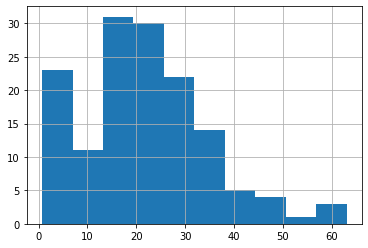

In [96]:
mrs = df.loc[df['Title'] == 'Mrs']
mrs_mean_age = np.mean(mrs['Age'])

mr = df.loc[df['Title'] == 'Mr']
mr_mean_age = np.mean(mr['Age'])

miss = df.loc[df['Title'] == 'Miss']
miss_mean_age = np.mean(miss['Age'])

master = df.loc[df['Title'] == 'Master']
master_mean_age = np.mean(master['Age'])

print('mrs_mean_age:', mrs_mean_age)
print('mr_mean_age:', mr_mean_age)
print('miss_mean_age:', miss_mean_age)
print('master_mean_age:', master_mean_age)
miss['Age'].hist()

In [71]:
def impute_ages(x):
    if pd.isnull(x['Age']):
        if x['Title'] == 'Mrs':
            return 35
        elif x['Title'] == 'Master':
            return 4.5
        elif x['Title'] == 'Miss':
            return 22
        else:
            return 33
    else:
        return x['Age']

df['Age'] = df.apply(impute_ages, axis=1)

In [72]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     203 non-null    object 
 8   Embarked  891 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,None,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,7.9250,None,S,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs
4,0,3,male,35.0,0,0,8.0500,None,S,Mr


In [73]:
df = pd.get_dummies(df, columns = ['Title', 'Embarked', 'Cabin'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Title_Master  891 non-null    uint8  
 8   Title_Miss    891 non-null    uint8  
 9   Title_Mr      891 non-null    uint8  
 10  Title_Mrs     891 non-null    uint8  
 11  Embarked_C    891 non-null    uint8  
 12  Embarked_Q    891 non-null    uint8  
 13  Embarked_S    891 non-null    uint8  
 14  Cabin_A       891 non-null    uint8  
 15  Cabin_B       891 non-null    uint8  
 16  Cabin_C       891 non-null    uint8  
 17  Cabin_D       891 non-null    uint8  
 18  Cabin_E       891 non-null    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
0,0,3,male,22.0,1,0,7.2500,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,1,female,38.0,1,0,71.2833,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [74]:
encoder = preprocessing.LabelEncoder()

features = ['Sex']
for feature in features:
    df[feature] = encoder.fit_transform(df[feature])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
0,0,3,1,22.0,1,0,7.2500,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [78]:
#make test and train data
y = df['Survived']
X = df.drop(['Survived'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=2, random_state=0)


print('cross_val_score: ', np.mean(cross_val_score(clf, X, y, cv=3)))
clf = clf.fit(x_train, y_train)


cross_val_score:  0.8204264870931537


In [83]:
clf1 = LogisticRegression(max_iter=1000).fit(x_train, y_train)
clf1.score(x_test, y_test)
print('cross_val_score: ', np.mean(cross_val_score(clf1, X, y, cv=3)))

cross_val_score:  0.8249158249158249


In [81]:
sum(y)/len(y)

0.3838383838383838